# Quick Analysis of MODIS EVI datasets

In [1]:
import sys
sys.path.insert(0, "../src")

import xarray as xr
import data_utils

%matplotlib inline

## Main EVI dataset

In [2]:
ds = xr.open_dataset("../data/exp_pro/MODIS_EVI_conus.nc", engine="h5netcdf")
ds

<xarray.Dataset>
Dimensions:  (time: 72, lon: 1400, lat: 880)
Coordinates:
  * lat      (lat) float64 61.97 61.92 61.88 61.83 ... 18.17 18.12 18.08 18.02
  * lon      (lon) float64 -130.0 -129.9 -129.9 -129.8 ... -60.12 -60.07 -60.02
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2020-12-01
Data variables:
    evi      (time, lon, lat) float32 ...

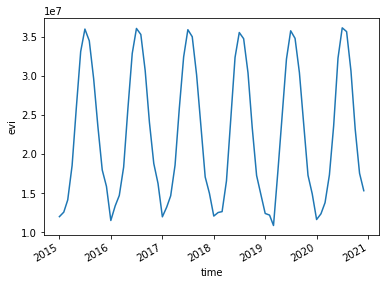

In [3]:
ds["evi"].mean(dim=["lon", "lat"]).plot()

In [4]:
ds.close()

## Augmented dataset

In [5]:
ds = xr.open_dataset("../data/exp_pro/OCO2_MODIS_4x5deg_monthly_conus_augmented.nc")
ds

<xarray.Dataset>
Dimensions:   (lon: 129, lat: 79, time: 76)
Coordinates:
  * lon       (lon) float64 -127.0 -126.5 -126.0 -125.5 ... -64.0 -63.5 -63.0
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 58.0 58.5 59.0 59.5
  * time      (time) datetime64[ns] 2014-09-01 2014-10-01 ... 2020-12-01
Data variables:
    xco2      (lon, lat, time) float32 ...
    xco2_var  (lon, lat, time) float32 ...
    sif       (lon, lat, time) float32 ...
    sif_var   (lon, lat, time) float32 ...
    evi       (lon, lat, time) float32 ...

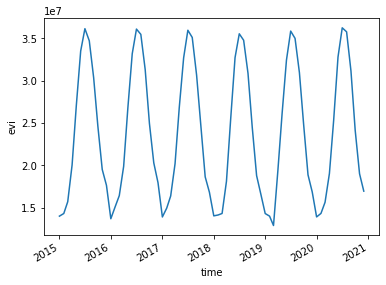

In [6]:
ds["evi"].mean(dim=["lon", "lat"]).plot()

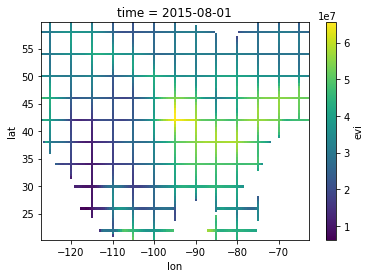

In [7]:
timestamp = "2015-08-01"
da = ds.evi.sel(time=timestamp)
da.T.plot()

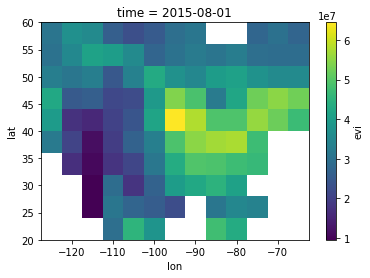

In [8]:
ds_main = data_utils.get_main_coords(da)
ds_main.evi.T.plot()